**Note:** place file one level up in directory structure so it can run properly.

In [198]:
import config
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream
from pymongo import MongoClient

import pandas as pd
import numpy as np

# For maps.
from mpl_toolkits.basemap import Basemap
import geocoder
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
try:
    import json
except ImportError:
    import simplejson as json

In [5]:
ACCESS_TOKEN = config.access_token
ACCESS_SECRET = config.access_secret
CONSUMER_KEY = config.consumer_key
CONSUMER_SECRET = config.consumer_secret

In [6]:
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

## Get Past Data with Search API ##

In [10]:
twitter = Twitter(auth=oauth)

In [11]:
search_results = twitter.search.tweets(q='red sox OR redsox since:2016-08-11 until:2016-08-12', result_type='recent', lang='en', count=10)

In [12]:
for tweet in search_results['statuses']:
    # Twitter Python Tool wraps the data returned by Twitter 
    # as a TwitterDictResponse object.
    # We convert it back to the JSON format to print/score
    print(json.dumps(tweet))

{"created_at": "Thu Aug 11 23:59:44 +0000 2016", "in_reply_to_user_id": 44698607, "text": "@ronniecoiro88 9 Red Sox championships? Doubt it. I've seen 5", "contributors": null, "geo": null, "source": "<a href=\"http://twitter.com/#!/download/ipad\" rel=\"nofollow\">Twitter for iPad</a>", "favorite_count": 0, "coordinates": null, "favorited": false, "place": null, "in_reply_to_user_id_str": "44698607", "is_quote_status": false, "user": {"created_at": "Tue Mar 29 01:30:17 +0000 2011", "is_translation_enabled": false, "profile_image_url": "http://pbs.twimg.com/profile_images/749081837608263680/lXEP_piL_normal.jpg", "profile_text_color": "333333", "protected": false, "time_zone": "Eastern Time (US & Canada)", "screen_name": "rilesmcDiles", "following": false, "profile_background_tile": true, "profile_sidebar_fill_color": "DDEEF6", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/376643443/The_single_greatest_picture_of_all_time.jpg", "location": "", "has_exte

## Get Live Data with Stream API ##

In [7]:
twitter_stream = TwitterStream(auth=oauth)

In [8]:
iterator = twitter_stream.statuses.filter(track='red sox, redsox', language='en')

In [9]:
tweet_count = 10
for tweet in iterator:
    tweet_count -= 1
    # Twitter Python Tool wraps the data returned by Twitter 
    # as a TwitterDictResponse object.
    # We convert it back to the JSON format to print/score
    print(json.dumps(tweet))
    if tweet_count <= 0:
        break

{"created_at": "Sat Aug 13 20:15:02 +0000 2016", "in_reply_to_user_id": null, "text": "RT @FrankBostonTank: Jonathan Papelbon officially released. Time for him to come home to Boston with Big Papi at the end of his final seaso\u2026", "contributors": null, "geo": null, "retweeted_status": {"created_at": "Sat Aug 13 19:18:09 +0000 2016", "entities": {"hashtags": [{"text": "RedSox", "indices": [121, 128]}], "urls": [], "user_mentions": [], "symbols": []}, "text": "Jonathan Papelbon officially released. Time for him to come home to Boston with Big Papi at the end of his final season. #RedSox", "contributors": null, "geo": null, "filter_level": "low", "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "favorite_count": 27, "coordinates": null, "favorited": false, "place": null, "in_reply_to_user_id_str": null, "is_quote_status": false, "user": {"created_at": "Fri Oct 08 23:01:57 +0000 2010", "profile_image_url": "http://pbs.twimg.com/profile

In [34]:
# Process Search data in JSON format. We use the file saved from last step as example.
tweets_filename = 'twitter_search_1000tweets.txt'
tweets_file = open(tweets_filename, "r")

for line in tweets_file:
    try:
        # Read in one line of the file, convert it into a json object 
        tweet = json.loads(line.strip())
        if 'text' in tweet: # only messages contains 'text' field is a tweet
            print(tweet['id']) # This is the tweet's id
            print(tweet['created_at']) # when the tweet posted
            print(tweet['text']) # content of the tweet
            print(tweet['coordinates']) # Geotag for the tweet
            print(tweet['user']['location'])
                        
            print(tweet['user']['id']) # id of the user who posted the tweet
            print(tweet['user']['name']) # name of the user, e.g. "Wei Xu"
            print(tweet['user']['screen_name']) # name of the user account, e.g. "cocoweixu"

            hashtags = []
            for hashtag in tweet['entities']['hashtags']:
                hashtags.append(hashtag['text'])
            print(hashtags)

    except:
        # read in a line is not in JSON format (sometimes error occured)
        continue

763887658099671040
Thu Aug 11 23:59:44 +0000 2016
@ronniecoiro88 9 Red Sox championships? Doubt it. I've seen 5
None

273721247
riley
rilesmcDiles
[]
763887625438633984
Thu Aug 11 23:59:36 +0000 2016
@espn I mean, what?!? Yankees and Red Sox to busy that day? Hell, all you show are Yanks, Red Sox, and Cubs...and the ratings fall....
None
Big Money USA
182935544
Patrick Frisone
lockedinmylair
[]
763887622305484803
Thu Aug 11 23:59:36 +0000 2016
Red Sox Game tomorrow 😝
None
Boston, MA 
219596624
Xrated.Emilia
EmiliaXrated
[]
763887609127075845
Thu Aug 11 23:59:33 +0000 2016
watching New York Yankees vs Boston Red Sox
None
Heaven bound!
184980594
Rev.Dr.C.F.DiNitto
TheSims3GEEK
[]
763887485680136192
Thu Aug 11 23:59:03 +0000 2016
@Mr_Rutherford I remember going to the Ted in '04 to see the Red Sox. 1 Yankees fan showed up and screamed 1918 the whole game.
None
Ajijic, Jalisco, Mexico
1029865488
Scott Mexico
SCompton72
[]
763887453400817664
Thu Aug 11 23:58:55 +0000 2016
2004 BOSTON RED SO

In [33]:
# Process Stream data in JSON format. We use the file saved from last step as example.
tweets_filename = 'twitter_stream_1000tweets.txt'
tweets_file = open(tweets_filename, "r")

for line in tweets_file:
    try:
        # Read in one line of the file, convert it into a json object 
        tweet = json.loads(line.strip())
        if 'text' in tweet: # only messages contains 'text' field is a tweet
            print(tweet['id']) # This is the tweet's id
            print(tweet['created_at']) # when the tweet posted
            print(tweet['text']) # content of the tweet
            print(tweet['coordinates']) # Geotag for the tweet
            print(tweet['place'])
            print(tweet['user']['location'])
                        
            print(tweet['user']['id']) # id of the user who posted the tweet
            print(tweet['user']['name']) # name of the user, e.g. "Wei Xu"
            print(tweet['user']['screen_name']) # name of the user account, e.g. "cocoweixu"

            hashtags = []
            for hashtag in tweet['entities']['hashtags']:
                hashtags.append(hashtag['text'])
            print(hashtags)

    except:
        # read in a line is not in JSON format (sometimes error occured)
        continue

764258313706012673
Sat Aug 13 00:32:35 +0000 2016
RT @lisa_scherber: The rain didn't stop the @RedSox players &amp; manager from spending time with @TheJimmyFund teens💛 https://t.co/XPgMB73Fgu
None
None
None
123023701
donna leonard
baseballballet
[]
764258315824205828
Sat Aug 13 00:32:36 +0000 2016
#RedSox vs. Diamondbacks lineups: Somehow, everyone is healthy https://t.co/33ZfXFgzUw https://t.co/sQePQ7LQba
None
None
Phoenix, AZ
711720569025273857
Zesty Diamondbacks
zesty_dbacks
['RedSox']
764258345033146368
Sat Aug 13 00:32:43 +0000 2016
RT @RedSox: AGAIN! 👀

Another 3-run moonshot for @HanleyRamirez! 8️⃣-2️⃣ https://t.co/Dl0XS5s6Hf
None
None
None
237554697
#ThankYouTD
VicFromTX
[]
764258371100901376
Sat Aug 13 00:32:49 +0000 2016
RT @wthballs: OTD 1974 @Angels Nolan Ryan K's 19 @RedSox One of three such games for him that year
@MLBStatoftheDay @MLB https://t.co/dgSYd…
None
None
Boston, MA
1110224557
red means run son
dk12446
[]
764258375639166976
Sat Aug 13 00:32:50 +0000 2016
Brando

In [1]:
# Process Search data in JSON format. We use the file saved from last step as example.
#tweets_filename = 'twitter_search_1000tweets.txt'
#tweets_file = open(tweets_filename, "r")

#geos = []
#for line in tweets_file:
#    try:
        # Read in one line of the file, convert it into a json object 
#        tweet = json.loads(line.strip())
#        if 'text' in tweet: # only messages contains 'text' field is a tweet
#            geos.append(tweet['user']['location'])
                        

#    except:
        # read in a line is not in JSON format (sometimes error occured)
#        continue

In [221]:
len(geos)

100

In [1619]:
# Process Stream data in JSON format. We use the file saved from last step as example.
tweets_filename = 'rays_search.txt'
tweets_file = open(tweets_filename, "r")

geos = []
for line in tweets_file:
    try:
        # Read in one line of the file, convert it into a json object 
        tweet = json.loads(line.strip())
        if 'text' in tweet: # only messages contains 'text' field is a tweet
            geos.append(tweet['text'])
            #geos.append(tweet['created_at'])
            #geos.append(tweet)
            #geos.append(tweet['user']['location'])
            #geos.append(tweet['favorite-count'])
                        

    except:
        # read in a line is not in JSON format (sometimes error occured)
        continue

In [1620]:
# This will be 1000 if successfully got 1000 tweets via the stream.
len(geos)

1000

In [1621]:
geos

["RT @Probgoblin: Reminder: You must endure the rain to find the rainbow.\nAnd there is nothing as beautiful as punching a dumb ol' rainbow in…",
 '1867 SHIELD NICKEL WITH RAYS **VERY NICE CIRCULATED COIN** FREE SHIPPING! https://t.co/QeqWpzEl9V https://t.co/2mtYePgvaI',
 "RT @pcaldera: Looking ahead to tomorrow: A-Rod is 2-for-15 (.133) vs. Rays' starter Chris Archer. But both hits are HRs, including one at T…",
 'Check out our Featured Inventory! Sea Rays, Meridians, Vikings, Aqua Bay and more! https://t.co/hTqMlMnYpC https://t.co/IxklJbsHIk',
 'Driva yah have waste time lock',
 'RT @TBTimes_Rays: #Rays-#Giants issue over Lucius Fox is closed, with no compensation. Teams agreed that foot pain had not yet been diagnos…',
 '#Losing Rays One Day  \nplayed on CHILL ONE radio #Chill : https://t.co/snxQXOgjQd',
 'RT @hudsonbelinsky: T2: #Rays prospect Josh Lowe strikes out swinging. Huge hack. Ball would have gone a long way if he had connected.',
 "RT @pcaldera: Looking ahead to tomorrow:

In [1468]:
# Process Stream data in JSON format. We use the file saved from last step as example.
tweets_filename = 'data/redsox_stream_08_14_1000.txt'
tweets_file = open(tweets_filename, "r")

geos = []
for line in tweets_file:
    try:
        # Read in one line of the file, convert it into a json object 
        tweet = json.loads(line.strip())
        if 'text' in tweet: # only messages contains 'text' field is a tweet
            #geos.append(tweet['text'])
            #geos.append(tweet)
            geos.append(tweet['user']['location'])
                        

    except:
        # read in a line is not in JSON format (sometimes error occured)
        continue

In [1469]:
# This will be 1000 if successfully got 1000 tweets via the stream.
len(geos)

1000

In [1067]:
geos

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Aug 16 03:26:52 +0000 2016',
  'entities': {'hashtags': [{'indices': [84, 91], 'text': 'Angels'}],
   'media': [{'display_url': 'pic.twitter.com/pwbsW6Bak0',
     'expanded_url': 'http://twitter.com/Mariners/status/765358745350119424/photo/1',
     'id': 765358741671686144,
     'id_str': '765358741671686144',
     'indices': [139, 140],
     'media_url': 'http://pbs.twimg.com/media/Cp8ZuHMUsAAwj9S.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/Cp8ZuHMUsAAwj9S.jpg',
     'sizes': {'large': {'h': 512, 'resize': 'fit', 'w': 1024},
      'medium': {'h': 512, 'resize': 'fit', 'w': 1024},
      'small': {'h': 340, 'resize': 'fit', 'w': 680},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'source_status_id': 765358745350119424,
     'source_status_id_str': '765358745350119424',
     'source_user_id': 41488578,
     'source_user_id_str': '41488578',
     'type': 'photo',
     'url': 'https://t.co/pwb

In [1458]:
df = pd.DataFrame(geos)

In [1459]:
df.shape

(1000, 31)

In [1069]:
df.head()

contributors coordinates                      created_at  \
0         None        None  Tue Aug 16 03:26:52 +0000 2016   
1         None        None  Tue Aug 16 03:26:56 +0000 2016   
2         None        None  Tue Aug 16 03:27:06 +0000 2016   
3         None        None  Tue Aug 16 03:27:07 +0000 2016   
4         None        None  Tue Aug 16 03:27:09 +0000 2016   

                                            entities  \
0  {'urls': [{'display_url': 'atmlb.com/2bu7FD0',...   
1  {'urls': [], 'hashtags': [{'text': 'Mariners',...   
2  {'urls': [], 'hashtags': [], 'user_mentions': ...   
3  {'urls': [{'display_url': 'dlvr.it/M2mg4W', 'i...   
4  {'urls': [{'display_url': 'dlvr.it/M2mgDk', 'i...   

                                   extended_entities  favorite_count  \
0  {'media': [{'display_url': 'pic.twitter.com/pw...               0   
1  {'media': [{'video_info': {'variants': [{'cont...               0   
2                                                NaN               0   
3  {'media': [{'display_url': 'pic.twitter.com/bM...               0   
4  {'media': [{'display_url': 'pic.twitter.com/Vp...               0   

  favorited filter_level   geo                  id  \
0     False          low  None  765389335461900288   
1     False          low  None  765389351379271681   
2     False          low  None  765389395432239104   
3     False          low  None  765389399701938176   
4     False          low  None  765389405628489728   

                         ...                         quoted_status_id  \
0                        ...                                      NaN   
1                        ...                                      NaN   
2                        ...                                      NaN   
3                        ...                                      NaN   
4                        ...                                      NaN   

  quoted_status_id_str  retweet_count retweeted  \
0                  NaN              0     False   
1                  NaN              0     False   
2                  NaN              0     False   
3                  NaN              0     False   
4                  NaN              0     False   

                                    retweeted_status  \
0  {'created_at': 'Tue Aug 16 01:25:19 +0000 2016...   
1  {'created_at': 'Tue Aug 16 03:15:58 +0000 2016...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://dlvr.it" rel="nofollow">dlvr.i...   
4  <a href="http://dlvr.it" rel="nofollow">dlvr.i...   

                                                text   timestamp_ms truncated  \
0  RT @Mariners: Felix aims to keep a strong stre...  1471318012477     False   
1  RT @Mariners: Mike Z getting it done. He singl...  1471318016272     False   
2  @Ranum5_pdx Thank you again my good man! I fou...  1471318026775     False   
3  Seattle #Mariners Ken Griffey Jr Christmas Orn...  1471318027793     False   
4  Nelson Cruz #23 Wristbands SEATTLE #Mariners 2...  1471318029206     False   

                                                user  
0  {'created_at': 'Sat Jul 28 00:32:28 +0000 2012...  
1  {'created_at': 'Tue Apr 21 14:36:12 +0000 2009...  
2  {'created_at': 'Fri Mar 02 15:45:44 +0000 2012...  
3  {'created_at': 'Mon May 30 01:37:04 +0000 2016...  
4  {'created_at': 'Mon May 30 01:37:04 +0000 2016...  

[5 rows x 31 columns]

In [1027]:
df[0].values

array(['Boston, NYC and elsewhere.', '', '', 'San Francisco, CA',
       'Gold Coast Darien-Norwalk, CT', 'George M. Steinbrenner Field',
       'Tampa, Florida', '', 'New York', '', '', 'midlothian, va',
       'Bloomfield, NJ', '', 'All Round The World',
       'Apaleado de la vida! XD', 'Ann Arbor, MI', 'Red Deer, AB',
       'Fort Worth, TX', 'Charlotte, NC', 'Savannah, GA', '',
       'New Jersey/New York City', 'wherever I set foot on ', 'Bronx, NY',
       '', '', '', 'New York, USA', 'New York, USA',
       'San Francisco, NoCal', 'Culver City and El Segundo, CA',
       'Jonesboro Arkansas ', '', 'Watertown, CT - New Brtian, CT',
       'New York, NY', 'Troy, NY', 'Troy, NY', 'Internet',
       'PHX NYC MVY BGI RUT', 'Albany, NY', 'Queens', 'New Orleans, LA',
       'Central Islip, New York 11722', 'Bemidji, MN',
       'George M. Steinbrenner Field', 'Tampa, Florida', 'in formation',
       'East Texas/Virginia', '', 'New York, New York',
       'New York, New York', 'Chicago

In [1030]:
df = df.dropna()

In [1031]:
df

0
0        Boston, NYC and elsewhere.
1                                  
2                                  
3                 San Francisco, CA
4     Gold Coast Darien-Norwalk, CT
5      George M. Steinbrenner Field
6                    Tampa, Florida
7                                  
8                          New York
9                                  
10                                 
11                   midlothian, va
12                   Bloomfield, NJ
13                                 
14              All Round The World
15          Apaleado de la vida! XD
16                    Ann Arbor, MI
17                     Red Deer, AB
18                   Fort Worth, TX
19                    Charlotte, NC
20                     Savannah, GA
21                                 
22         New Jersey/New York City
23          wherever I set foot on 
24                        Bronx, NY
25                                 
26                                 
27                                 
28                    New York, USA
29                    New York, USA
..                              ...
970                      My America
971                                
972                        Troy, NY
973                        Troy, NY
974                        out here
975  161st Street and River Avenue 
976                             9️⃣
977                   New York, USA
978                   New York City
979                            KCMO
980                    New York, NY
981                  Alexandria, VA
982                     Long Island
983               Atlantic City, NJ
984                    New York, NY
985                         Florida
986                        New York
987                   New York, USA
988                       Bronx, NY
989                             NYC
990                   New York, USA
991     Everywhere Yankee Fans are.
992                   New York, USA
993                              MA
994                                
995                     New England
996                                
997                                
998                                
999           In-Studio & Ringside 

[1000 rows x 1 columns]

In [2]:
#coords = []
#for location in geos:
#    g = geocoder.google(location)
#    coords.append(g.latlng)

In [1033]:
coords

[[42.3600825, -71.0588801],
 [],
 [],
 [37.7749295, -122.4194155],
 [41.11774399999999, -73.4081575],
 [37.1234921, -113.5059227],
 [27.950575, -82.4571776],
 [],
 [40.7127837, -74.0059413],
 [],
 [],
 [37.52405410000001, -77.66555989999999],
 [40.8067546, -74.1854209],
 [],
 [],
 [],
 [42.2808256, -83.7430378],
 [52.2681118, -113.8112386],
 [32.7554883, -97.3307658],
 [35.2270869, -80.8431267],
 [32.0835407, -81.09983419999999],
 [],
 [40.7127837, -74.0059413],
 [],
 [40.8370495, -73.86542949999999],
 [],
 [],
 [],
 [40.7127837, -74.0059413],
 [40.7127837, -74.0059413],
 [37.7749295, -122.4194155],
 [33.9191799, -118.4164652],
 [35.84229670000001, -90.704279],
 [],
 [41.6062042, -73.11833969999999],
 [40.7127837, -74.0059413],
 [42.7284117, -73.69178509999999],
 [42.7284117, -73.69178509999999],
 [15.1219947, 105.8021808],
 [],
 [42.6525793, -73.7562317],
 [40.7282239, -73.7948516],
 [29.95106579999999, -90.0715323],
 [40.7881249, -73.19396119999999],
 [47.4875361, -94.8858492],
 [37.

In [180]:
coords_nonempty = [location for location in coords if location != []]

In [3]:
# Not working now for some reason (query limit, turns out).
#g = geocoder.google(df[0].values[0])
#g.latlng[0]

In [1470]:
from pygeocoder import Geocoder

address = Geocoder.geocode(geos[0])
print(address.valid_address)
print(address.country)
print(address.coordinates)

True
Australia
(-34.0686157, 137.5921768)


In [263]:
g = geocoder.google(geos[0])
g.latlng

[]

In [134]:
lats = []
longs = []
for location in geos:
    g = geocoder.google(location)
    if g.latlng != []:
        lats.append(g.latlng[0])
        longs.append(g.latlng[1])
    else:
        lats.append(np.nan)
        longs.append(np.nan)

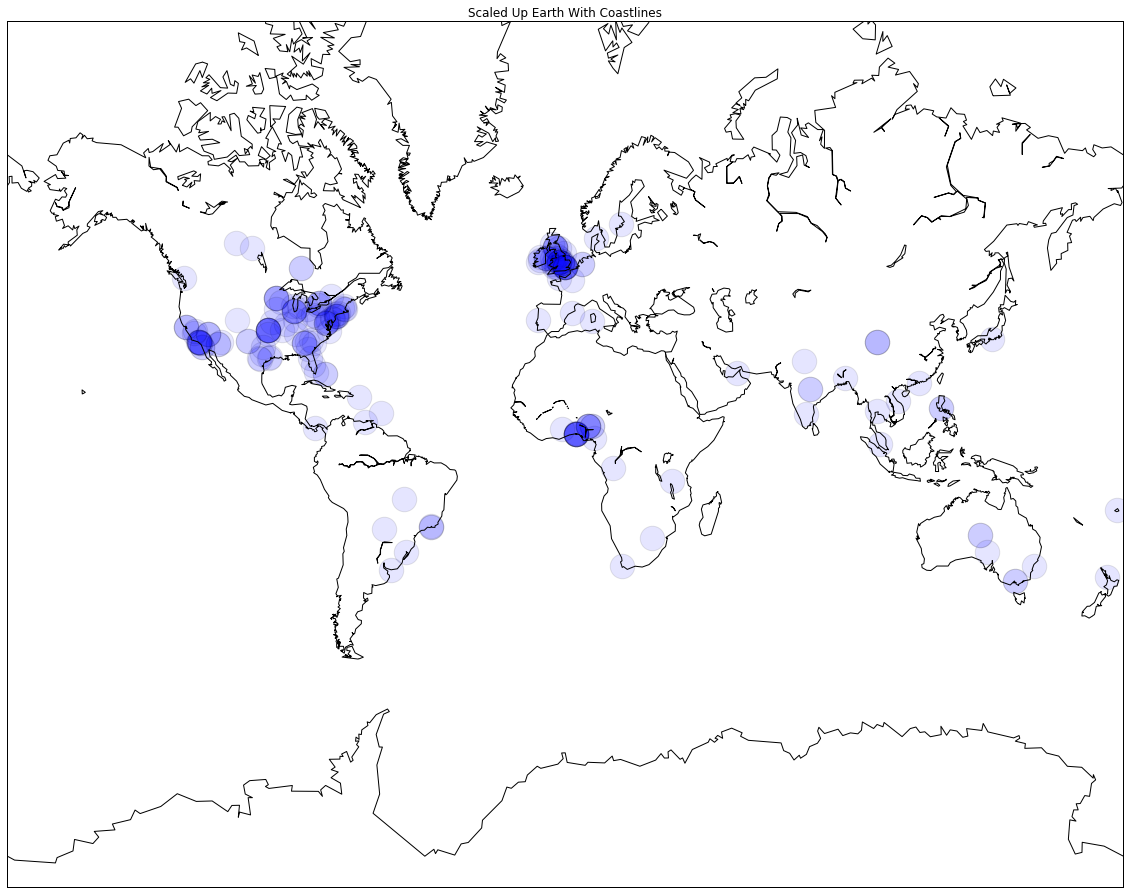

In [1034]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longs, lats)
m.scatter(x, y, s=600, alpha=0.1)
m.drawcoastlines()
plt.show()

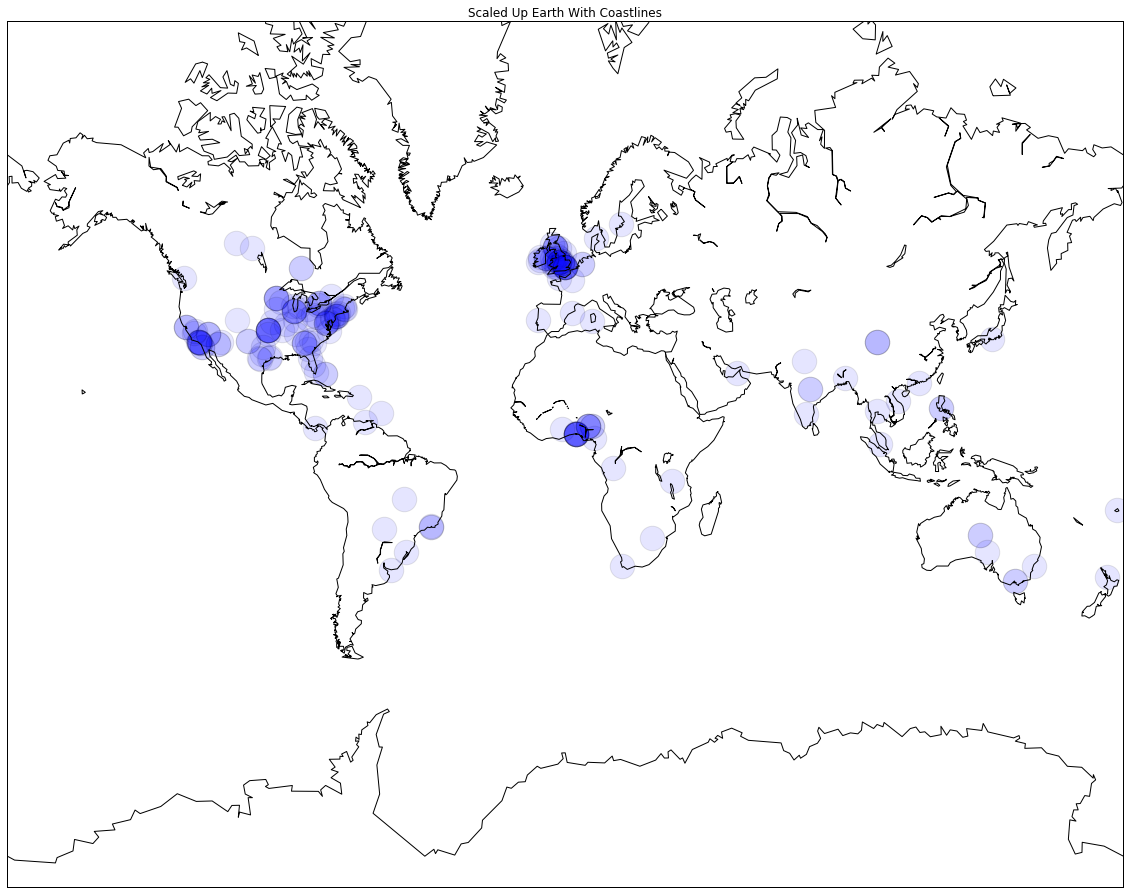

In [171]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longs, lats)
m.scatter(x, y, s=600, alpha=0.1)
m.drawcoastlines()
plt.show()